# Signal modeling

- Shifting
- Spikes
- Anti shift
- Anti spikes

Signals:

- Harmonic
- Random
- Linear function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from helpersmd import getRandomND
from helpersmd import getMyRandom
from helpersmd import harm
from helpersmd import shift
from helpersmd import spike
from plotmd import plotVector,plot2D
from helpersmd import fourierTransform
from helpersmd import getScaledDomain 
from helpersmd import cutSignal

## Fourier transform for shifted signal
* Create a harmonic signal 

$f(x)=Asin(2\pi f_0t)$

* Shift this signal by C

$A=100 ;f_0=53 ; C=1000$

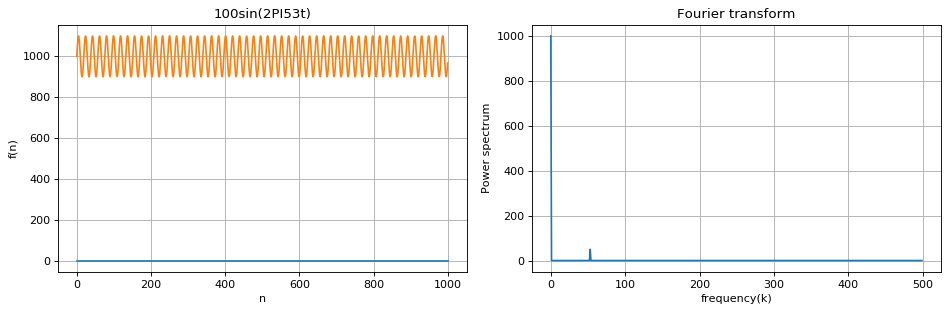

In [3]:
N=1000
dt=0.001
# 100sin(2PI53t)
A=100
c=1000
f=53

xk,desc1=harm(A,f,dt,N)
xk=shift(xk,c)
Cn=fourierTransform(xk,N)
Cn=Cn[:N/2]
f=getScaledDomain(dt,N)[:N/2]

plt.figure(1,figsize=(12, 4), dpi=80)
plt.subplot(121)
plt.plot([0,1000],[0,0])
plotVector(xk,desc1,"n","f(n)")
plt.subplot(122)
plot2D(f,Cn,"Fourier transform","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()

## Implement AntiShift for a signal

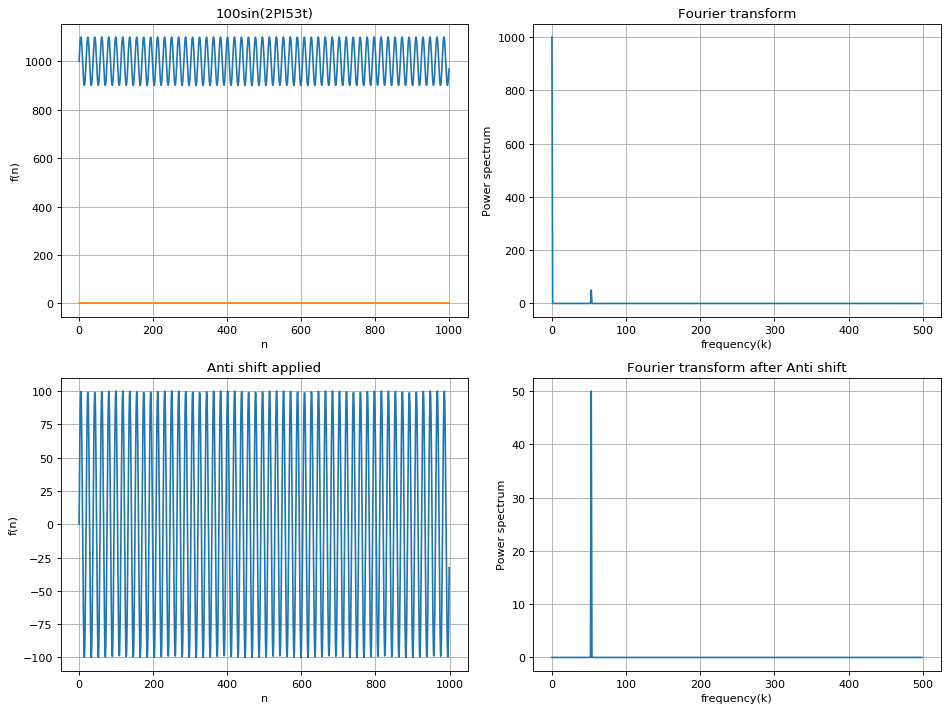

In [4]:
def antiShift(X):
    return X-X.mean()

xk2=antiShift(xk)
Cn2=fourierTransform(xk2,N)
Cn2=Cn2[:N/2]

plt.figure(2,figsize=(12, 9), dpi=80)
plt.subplot(221)
plotVector(xk,desc1,"n","f(n)")
plt.plot([0,1000],[0,0])
plt.subplot(222)
plot2D(f,Cn,"Fourier transform","frequency(k)","Power spectrum")
plt.subplot(223)
plotVector(xk2,"Anti shift applied","n","f(n)")
plt.subplot(224)
plot2D(f,Cn2,"Fourier transform after Anti shift","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()


## Process signal of linear function 

$f(x)=ax+b$

a=0.5;b=100

compute Fourier transform

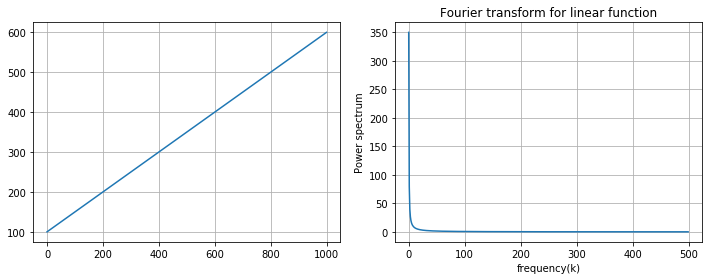

In [5]:
a=0.5
b=100
dt=0.001

xk=np.arange(N)
yk=a*xk+b

plt.figure(3,figsize=(10, 4))
plt.subplot(121)
plt.plot(yk)
plt.grid()
Cn3=fourierTransform(yk,N)
Cn3=Cn3[:N/2]
plt.subplot(122)
plot2D(f,Cn3,"Fourier transform for linear function","frequency(k)","Power spectrum")
plt.tight_layout()

plt.show()

## Random Signal and Fourier transform

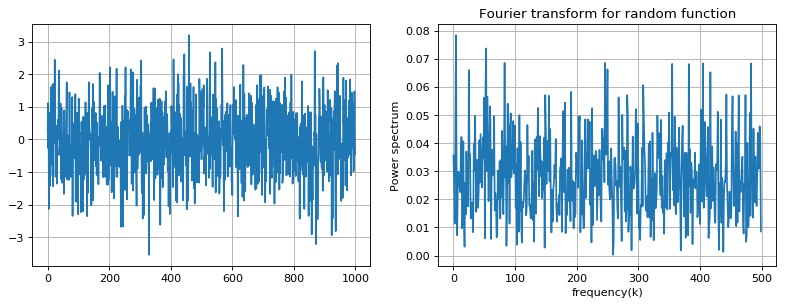

In [6]:
xk=getRandomND(N)
Cn4=fourierTransform(xk,N)
Cn4=Cn4[:N/2]

plt.figure(3,figsize=(12, 4), dpi=80)
plt.subplot(121)
plt.plot(xk)
plt.grid()
plt.subplot(122)
plot2D(f,Cn4,"Fourier transform for random function","frequency(k)","Power spectrum")
plt.show()

## Spikes and Fourier transform

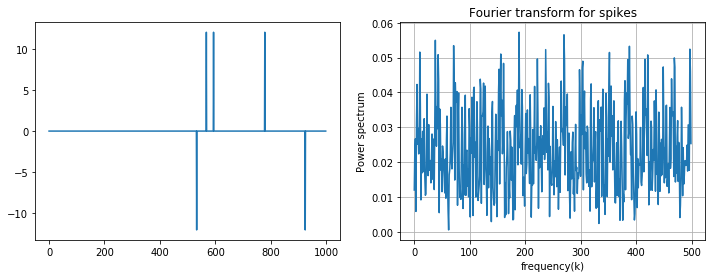

In [7]:
xk=np.zeros((N,1))
xk=spike(xk,5)
Cn5=fourierTransform(xk,N)
Cn5=Cn5[:N/2]

plt.figure(4,figsize=(12, 4))
plt.subplot(121)
plt.grid()
plotVector(xk,"","","")
plt.subplot(122)
plot2D(f,Cn5,"Fourier transform for spikes","frequency(k)","Power spectrum")
plt.show()

## Implement anti Spikes

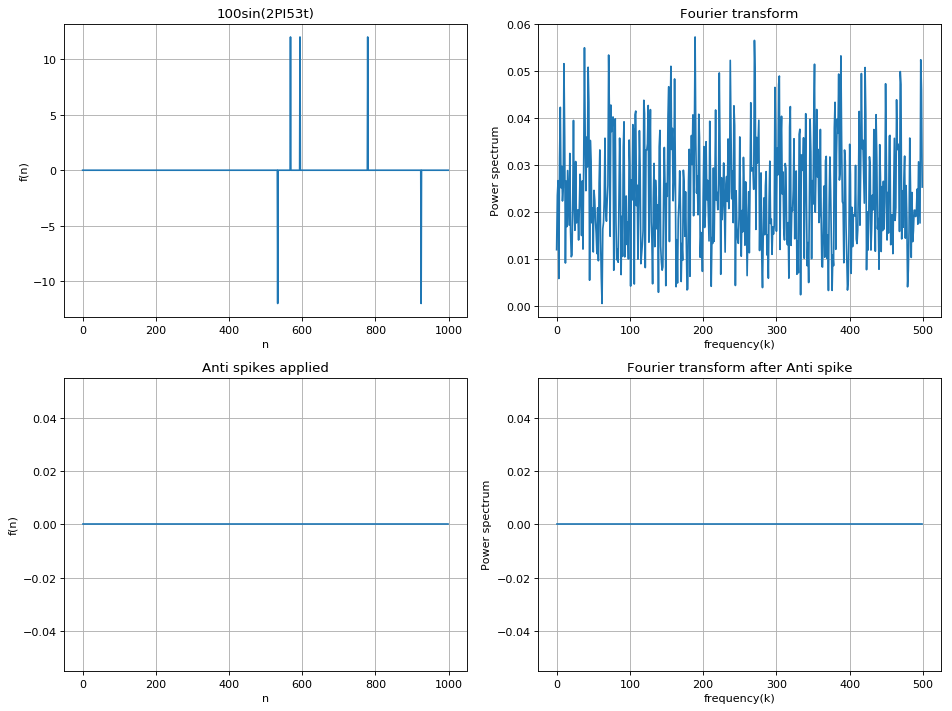

In [8]:
def removeSpikes(sig):
    _X=np.copy(sig)
    mean=_X.mean()
    std=_X.std()
    _X=(_X-mean)/std
    for i in range(1,_X.shape[0]-1):
        if abs(_X[i])>2:
            _X[i]=(_X[i-1]+_X[i+1])/2
    _X=(_X*std)+mean
    return _X
filtered=removeSpikes(xk)
Cn6=fourierTransform(filtered,N)
Cn6=Cn6[:N/2]

plt.figure(4,figsize=(12, 9), dpi=80)
plt.subplot(221)
plotVector(xk,desc1,"n","f(n)")
plt.subplot(222)
plot2D(f,Cn5,"Fourier transform","frequency(k)","Power spectrum")
plt.subplot(223)
plotVector(filtered,"Anti spikes applied","n","f(n)")
plt.subplot(224)
plot2D(f,Cn6,"Fourier transform after Anti spike","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()


## ِApply anti spikes on harmonic signal

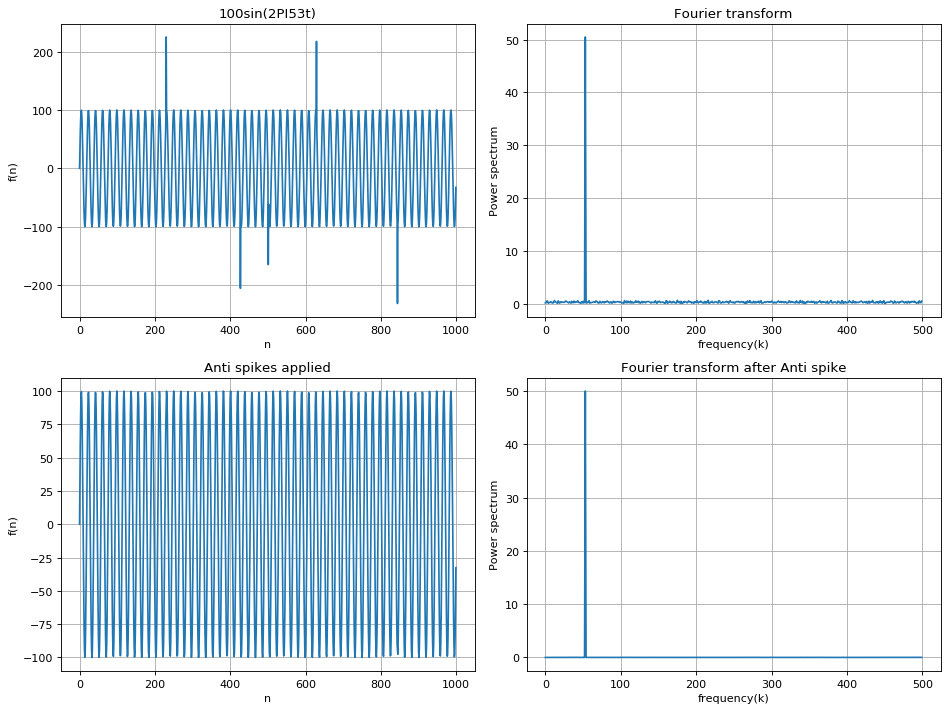

In [9]:
# 100sin(2PI53t)
A=100
c=1000
f=53

xk,desc1=harm(A,f,dt,N)
xk=spike(xk,5)
Cn7=fourierTransform(xk,N)
Cn7=Cn7[:N/2]
f=getScaledDomain(dt,N)[:N/2]

filtered=removeSpikes(xk)
Cn8=fourierTransform(filtered,N)
Cn8=Cn8[:N/2]

plt.figure(4,figsize=(12, 9), dpi=80)
plt.subplot(221)
plotVector(xk,desc1,"n","f(n)")
plt.subplot(222)
plot2D(f,Cn7,"Fourier transform","frequency(k)","Power spectrum")
plt.subplot(223)
plotVector(filtered,"Anti spikes applied","n","f(n)")
plt.subplot(224)
plot2D(f,Cn8,"Fourier transform after Anti spike","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()

## Using Fourier transform to filter spikes !

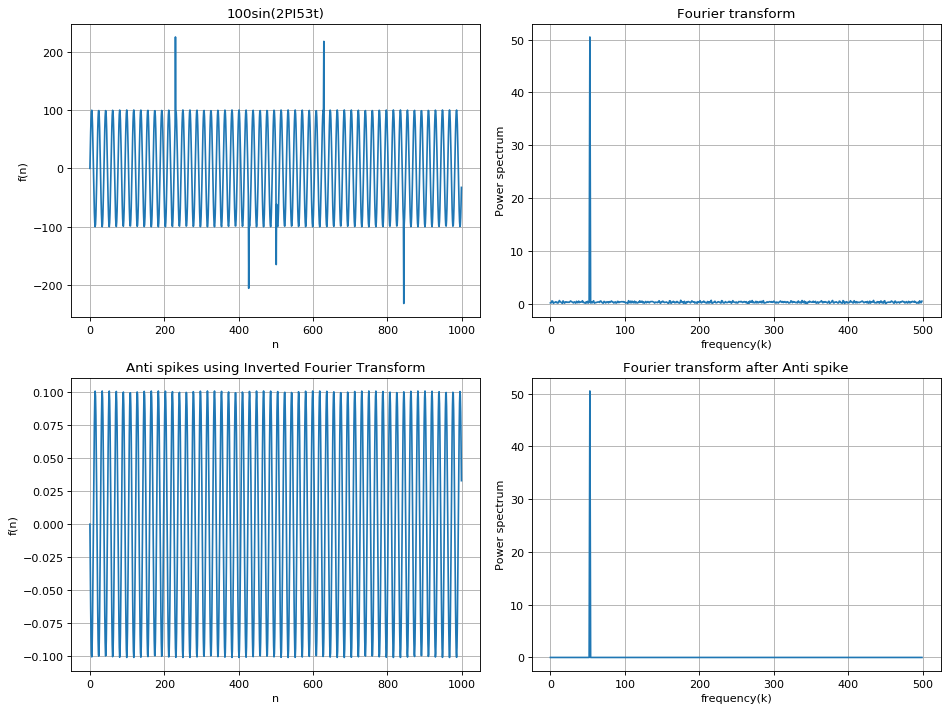

In [10]:
from helpersmd import getRe,getIm,getCn
im=getIm(xk,N).reshape(N)
re=getRe(xk,N).reshape(N)
im[abs(im)<1]=0
re[abs(re)<1]=0
fft=re+im*1.j
org=np.fft.ifft(fft)
Cn9=getCn(im,re,N)[:N/2]


plt.figure(4,figsize=(12, 9), dpi=80)
plt.subplot(221)
plotVector(xk,desc1,"n","f(n)")
plt.subplot(222)
plot2D(f,Cn7,"Fourier transform","frequency(k)","Power spectrum")
plt.subplot(223)
plotVector(np.real(org),"Anti spikes using Inverted Fourier Transform","n","f(n)")
plt.subplot(224)
plot2D(f,Cn9,"Fourier transform after Anti spike","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()